<a href="https://colab.research.google.com/github/ckurtz/teaching_UPC_UFRMI/blob/main/selfsupervised_demos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# References

[Course Webpage](https://sites.google.com/view/berkeley-cs294-158-sp20/home)

[1] Pathak, Deepak, et al. "Context encoders: Feature learning by inpainting." Proceedings of the IEEE conference on computer vision and pattern recognition. 2016.

[2] Gidaris, Spyros, Praveer Singh, and Nikos Komodakis. "Unsupervised representation learning by predicting image rotations." arXiv preprint arXiv:1803.07728 (2018).

[3] Chen, Ting, et al. "A simple framework for contrastive learning of visual representations." arXiv preprint arXiv:2002.05709 (2020).

[4] Noroozi, Mehdi, and Paolo Favaro. "Unsupervised learning of visual representations by solving jigsaw puzzles." European Conference on Computer Vision. Springer, Cham, 2016.

[5] Wang, Xiaolong, Allan Jabri, and Alexei A. Efros. "Learning correspondence from the cycle-consistency of time." Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition. 2019.

[6] Oord, Aaron van den, Yazhe Li, and Oriol Vinyals. "Representation learning with contrastive predictive coding." arXiv preprint arXiv:1807.03748 (2018).

[7] Hénaff, Olivier J., et al. "Data-efficient image recognition with contrastive predictive coding." arXiv preprint arXiv:1905.09272 (2019).

[8] Tian, Yonglong, Dilip Krishnan, and Phillip Isola. "Contrastive multiview coding." arXiv preprint arXiv:1906.05849 (2019).

[9] He, Kaiming, et al. "Momentum contrast for unsupervised visual representation learning." arXiv preprint arXiv:1911.05722 (2019).

[10] Doersch, Carl, Abhinav Gupta, and Alexei A. Efros. "Unsupervised visual representation learning by context prediction." Proceedings of the IEEE International Conference on Computer Vision. 2015.

[11] Ronneberger, Olaf, Philipp Fischer, and Thomas Brox. "U-net: Convolutional networks for biomedical image segmentation." International Conference on Medical image computing and computer-assisted intervention. Springer, Cham, 2015.

# Getting Started
Go to **Runtime -> Change runtime type** and make sure **Hardward accelerator** is set to **GPU**

In [1]:
!if [ -d cs294-158-ssl ]; then rm -Rf cs294-158-ssl; fi
!git clone https://github.com/ckurtz/cs294-158-ssl
!pip install cs294-158-ssl/

import os
os.chdir('cs294-158-ssl')

Cloning into 'cs294-158-ssl'...
remote: Enumerating objects: 611, done.
remote: Counting objects: 100% (189/189), done.
remote: Compressing objects: 100% (136/136), done.
remote: Total 611 (delta 115), reused 119 (delta 53), pack-reused 422 (from 1)
Receiving objects: 100% (611/611), 3.11 MiB | 11.81 MiB/s, done.
Resolving deltas: 100% (424/424), done.
Processing ./cs294-158-ssl
  Preparing metadata (setup.py) ... done
  Created wheel for deepul_helper: filename=deepul_helper-0.1.0-py3-none-any.whl size=25300 sha256=d949a52393863837381956f8156b436597577304e3138dae3b25ef6da2f2a37f
  Stored in directory: /root/.cache/pip/wheels/e3/df/97/281e32d717214451862e0e558746de423b9ef530b7376421e2
Successfully built deepul_helper


Run the cells below to download the necessary pretrained models. It should take a few minutes.

In [2]:
!wget https://camille-kurtz.com/teaching/data.zip
!unzip -qq data.zip
!rm data.zip

--2024-11-09 18:39:47--  https://camille-kurtz.com/teaching/data.zip
Resolving camille-kurtz.com (camille-kurtz.com)... 213.186.33.3
Connecting to camille-kurtz.com (camille-kurtz.com)|213.186.33.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4227668031 (3.9G) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]   3.94G  13.0MB/s    in 5m 16s  

2024-11-09 18:45:04 (12.8 MB/s) - ‘data.zip’ saved [4227668031/4227668031]



In [12]:
!wget https://camille-kurtz.com/teaching/results.zip
!unzip -qq results.zip
!rm results.zip

--2024-11-09 18:53:41--  https://camille-kurtz.com/teaching/results.zip
Resolving camille-kurtz.com (camille-kurtz.com)... 213.186.33.3
Connecting to camille-kurtz.com (camille-kurtz.com)|213.186.33.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2636425194 (2.5G) [application/zip]
Saving to: ‘results.zip’

results.zip         100%[===================>]   2.46G  17.8MB/s    in 2m 29s  

2024-11-09 18:56:12 (16.9 MB/s) - ‘results.zip’ saved [2636425194/2636425194]



The models and demos shown were pre-trained. The code used for all the demos can be found in the github repo [here](https://github.com/wilson1yan/cs294-158-ssl). Follow the README to train models on CIFAR10 or ImageNet.

# Self-Supervised Learning Tasks
Self-supervised learning is a rapidly growing field, its success largely accelerated by growing compute and the vast amount of unlabeled data available for training. The hope is that by pretraining on specially designed self-supervised tasks, the models would be able to learn semantically meaningful representations to be used for downstream tasks. In the following demos, we will look at a few examples of these self-supervised tasks.

In [ ]:
from deepul_helper.demos import load_model_and_data, evaluate_accuracy, display_nearest_neighbors, show_context_encoder_inpainting

%matplotlib inline

## Demo 1: Context Encoder [[1]](https://arxiv.org/abs/1604.07379)

The context encoder structures its self-supervised learning task by inpainting masked images. For example, the figure below shows different masking shapes, such as center masking, random block masking, and segmentation masking. Note that segmentation masking (c) is not purely self-supervised since we would need to train a image segmentation model which requires labels. However, the other two masking schemes (a) and (b) and purely self-supervised.

![](https://drive.google.com/uc?id=1fhzkULYTtyMGUUF2n9dlPayJSdcY5pRv)

More formally, the context encoder optimizes the following reconstruction loss:
$$\mathcal{L}_{rec} = \left\Vert \hat{M} \odot (x - F((1 - \hat{M})\odot x)) \right\Vert^2_2$$
where $\hat{M}$ is the masked region, $x$ is the image, and $F$ is the context encoder that tries to reconstruct the masked portion. In addition to the reconstruction loss, the paper introduces an adversarial loss that encourages more realistic inpaintings.
$$L_{adv} = \max_D \mathbb{E}_{x\in \chi} [\log(D(x)) + \log(1 - D(F((1-\hat{M})\odot x)))]$$
However, this demo does not use the adversarial portion of the loss.

### Example Code

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class ContextEncoder(nn.Module):
    metrics = ['Loss']
    metrics_fmt = [':.4e']

    def __init__(self, dataset, n_classes):
        super().__init__()
        input_channels = 3

        self.latent_dim = 4000

        # Encodes the masked image
        self.encoder = nn.Sequential(
            # 128 x 128 Input
            nn.Conv2d(input_channels, 64, 4, stride=2, padding=1), # 64 x 64
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 64, 4, stride=2, padding=1), # 32 x 32
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 128, 4, stride=2, padding=1), # 16 x 16
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 256, 4, stride=2, padding=1), # 8 x 8
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(256, 512, 4, stride=2, padding=1), # 4 x 4
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(512, self.latent_dim, 4) # 1 x 1
        )

        # Only reconstructs the masked part of the image and not the whole image
        self.decoder = nn.Sequential(
           nn.BatchNorm2d(self.latent_dim),
           nn.ReLU(inplace=True),
           nn.ConvTranspose2d(self.latent_dim, 512, 4, stride=1, padding=0), # 4 x 4
           nn.BatchNorm2d(512),
           nn.ReLU(inplace=True),
           nn.ConvTranspose2d(512, 256, 4, stride=2, padding=1), # 8 x 8
           nn.BatchNorm2d(256),
           nn.ReLU(inplace=True),
           nn.ConvTranspose2d(256, 128, 4, stride=2, padding=1), # 16 x 16
           nn.BatchNorm2d(128),
           nn.ReLU(inplace=True),
           nn.ConvTranspose2d(128, 64, 4, stride=2, padding=1), # 32 x 32
           nn.BatchNorm2d(64),
           nn.ReLU(inplace=True),
           nn.ConvTranspose2d(64, input_channels, 4, stride=2, padding=1), # 64 x 64
           nn.Tanh()
        )

        self.dataset = dataset
        self.n_classes = n_classes

    def construct_classifier(self):
        classifier = nn.Sequential(
            nn.Flatten(),
            nn.BatchNorm1d(self.latent_dim, affine=False),
            nn.Linear(self.latent_dim, self.n_classes)
        )
        return classifier

    def forward(self, images):
        # Extract a 64 x 64 center from 128 x 128 image
        images_center = images[:, :, 32:32+64, 32:32+64].clone()
        images_masked = images.clone()
        # Mask out a 64 x 64 center with slight overlap
        images_masked[:, 0, 32+4:32+64-4, 32+4:32+64-4] = 2 * 117.0/255.0 - 1.0
        images_masked[:, 1, 32+4:32+64-4, 32+4:32+64-4] = 2 * 104.0/255.0 - 1.0
        images_masked[:, 2, 32+4:32+64-4, 32+4:32+64-4] = 2 * 123.0/255.0 - 1.0

        z = self.encoder(images_masked)
        center_recon = self.decoder(z)

        return dict(Loss=F.mse_loss(center_recon, images_center)), torch.flatten(z, 1)

    def encode(self, images):
        images_masked = images
        images_masked[:, 0, 32+4:32+64-4, 32+4:32+64-4] = 2 * 117.0/255.0 - 1.0
        images_masked[:, 1, 32+4:32+64-4, 32+4:32+64-4] = 2 * 104.0/255.0 - 1.0
        images_masked[:, 2, 32+4:32+64-4, 32+4:32+64-4] = 2 * 123.0/255.0 - 1.0
        return self.encoder(images_masked)

    def reconstruct(self, images):
        images_center = images[:, :, 32:32+64, 32:32+64].clone()
        images_masked = images.clone()
        images_masked[:, 0, 32+4:32+64 - 4, 32+4:32+64-4] = 2 * 117.0/255.0 - 1.0
        images_masked[:, 1, 32+4:32+64 - 4, 32+4:32+64-4] = 2 * 104.0/255.0 - 1.0
        images_masked[:, 2, 32+4:32+64 - 4, 32+4:32+64-4] = 2 * 123.0/255.0 - 1.0

        z = self.encoder(images_masked)
        center_recon = self.decoder(z)

        images_recon = images_masked.clone()
        images_recon[:, :, 32:32+64, 32:32+64] = center_recon
        return images_masked, images_recon


### Inpainting Examples
For each pair of images, the left image is the masked input and the right the inpainted reconstruction.

Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/content/cs294-158-ssl/deepul_helper/demos.py:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickli

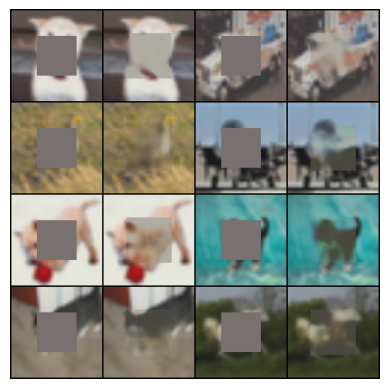

In [ ]:
show_context_encoder_inpainting()

### Linear Classification
By design the model architecture is an encoder -> decoder module. We can use the bottleneck layer as our learned representation. Below, we show linear classification accuracy results on CIFAR10 using the learned representations.

In [ ]:
model_demo1, linear_classifier_demo1, train_loader_demo1, test_loader_demo1 = load_model_and_data('context_encoder')
evaluate_accuracy(model_demo1, linear_classifier_demo1, train_loader_demo1, test_loader_demo1)

Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/content/cs294-158-ssl/deepul_helper/demos.py:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickli

Train Set
Top 1 Accuracy: 53.236, Top 5 Accuracy: 94.094

Test Set
Top 1 Accuracy: 45.77, Top 5 Accuracy: 90.29



### Nearest Neighbors
Another way to evaluate our learned representation is to look at nearest neighbors to random encoded images in latent space.

Image 1


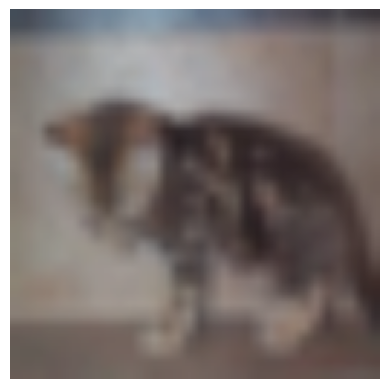

Top 16 Nearest Neighbors (in latent space)


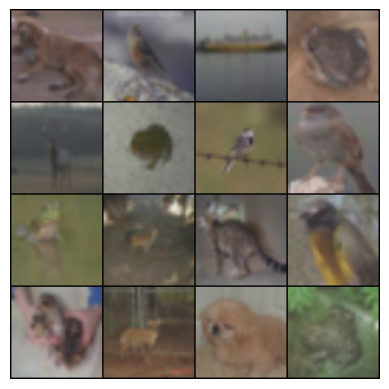

Image 2


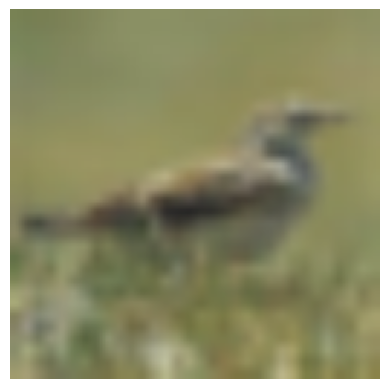

Top 16 Nearest Neighbors (in latent space)


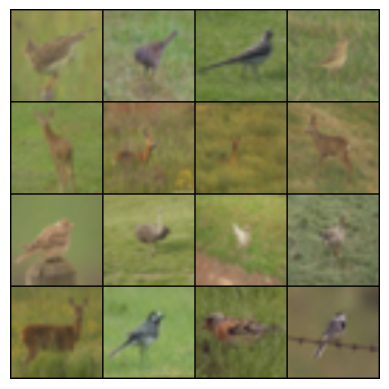

Image 3


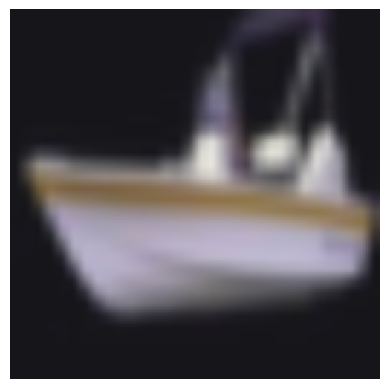

Top 16 Nearest Neighbors (in latent space)


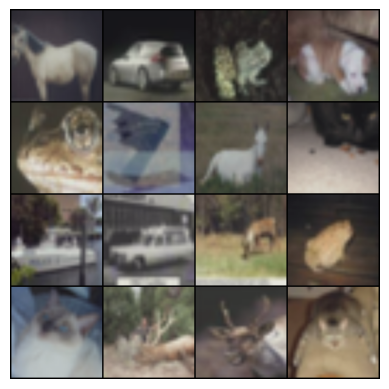

Image 4


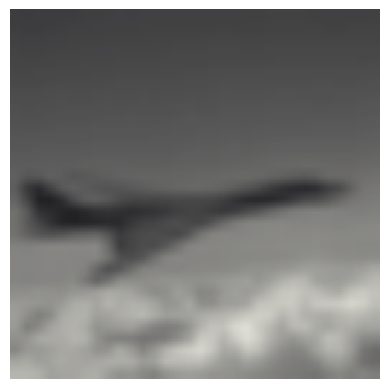

Top 16 Nearest Neighbors (in latent space)


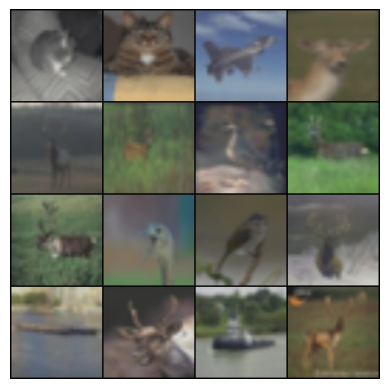

In [ ]:
display_nearest_neighbors('context_encoder', model_demo1, test_loader_demo1)

## Demo 2: Rotation Prediction [[2]](https://arxiv.org/abs/1803.07728)

In this paper, the authors show that accurately predicting the degrees of rotation in images is a self-supervised learning task that learns good representations for downstream tasks.

![](https://drive.google.com/uc?id=1eHXLH-N_6uMGRzdf1Wjnga26qlS5-FRv)

More specifically, the authors showed that training a common CNN architecture (AlexNet, ResNet) on the rotation task learns semantically interpretable convolutional masks similar to those learned in supervised learning.

### Example Code

In [ ]:
import math

import torch
import torch.nn as nn
import torch.nn.functional as F


class RotationPrediction(nn.Module):
    metrics = ['Loss', 'Acc1']
    metrics_fmt = [':.4e', ':6.2f']

    def __init__(self, dataset, n_classes):
        super().__init__()
        if dataset == 'cifar10':
            self.model = NetworkInNetwork()
            self.latent_dim = 192 * 8 * 8
            self.feat_layer = 'conv2'
        elif 'imagenet' in dataset:
            self.model = AlexNet()
            self.latent_dim = 256 * 13 * 13
            self.feat_layer = 'conv5'
        else:
            raise Exception('Unsupported dataset:', dataset)
        self.dataset = dataset
        self.n_classes = n_classes

    def construct_classifier(self):
        if self.dataset == 'cifar10':
            classifier = nn.Sequential(
                Flatten(),
                nn.BatchNorm1d(self.latent_dim, affine=False),
                nn.Linear(self.latent_dim, self.n_classes)
            )
        elif 'imagenet' in self.dataset:
            classifier = nn.Sequential(
                nn.AdaptiveMaxPool2d((6, 6)),
                nn.BatchNorm2d(256, affine=False),
                Flatten(),
                nn.Linear(256 * 6 * 6, self.n_classes)
            )
        else:
            raise Exception('Unsupported dataset:', dataset)
        return classifier

    def forward(self, images):
        batch_size = images.shape[0]
        images, targets = self._preprocess(images)
        targets = targets.to(images.get_device())

        logits, zs = self.model(images, out_feat_keys=('classifier', self.feat_layer))
        loss = F.cross_entropy(logits, targets)

        pred = logits.argmax(dim=-1)
        correct = pred.eq(targets).float().sum()
        acc = correct / targets.shape[0] * 100.

        return dict(Loss=loss, Acc1=acc), zs[:batch_size]

    def encode(self, images):
        zs = self.model(images, out_feat_keys=(self.feat_layer,))
        return zs

    def _preprocess(self, images):
        batch_size = images.shape[0]
        images_90 = torch.flip(images.transpose(2, 3), (2,))
        images_180 = torch.flip(images, (2, 3))
        images_270 = torch.flip(images, (2,)).transpose(2, 3)
        images_batch = torch.cat((images, images_90, images_180, images_270), dim=0)
        targets = torch.arange(4).long().repeat(batch_size)
        targets = targets.view(batch_size, 4).transpose(0, 1)
        targets = targets.contiguous().view(-1)
        return images_batch, targets

### Linear Classification
We can use the feature maps in the later convolutional layers of the pretrained model as our learned representation for linear classification.

In [ ]:
model, linear_classifier, train_loader, test_loader = load_model_and_data('rotation')
evaluate_accuracy(model, linear_classifier, train_loader, test_loader)

Files already downloaded and verified
Files already downloaded and verified
Train Set
Top 1 Accuracy: 79.472, Top 5 Accuracy: 99.082

Test Set
Top 1 Accuracy: 79.91, Top 5 Accuracy: 99.12



### Nearest Neighbors
Another way to evaluate our learned representation is to look at nearest neighbors to random encoded images in latent space.

Image 1


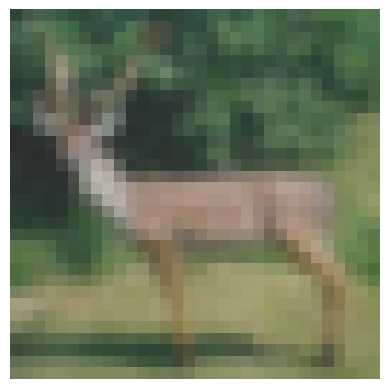

Top 16 Nearest Neighbors (in latent space)


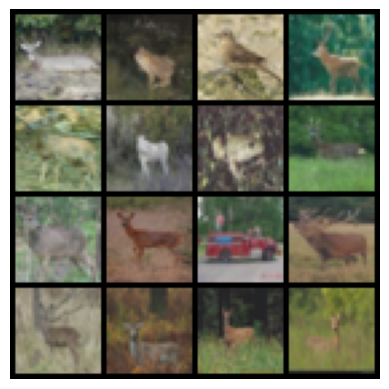

Image 2


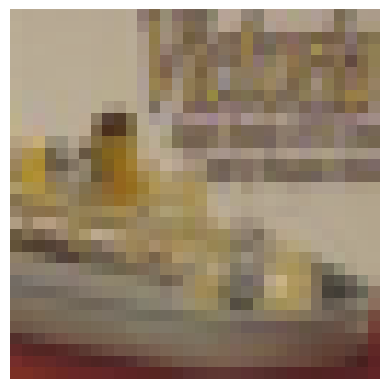

Top 16 Nearest Neighbors (in latent space)


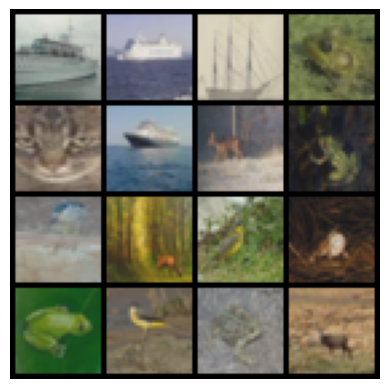

Image 3


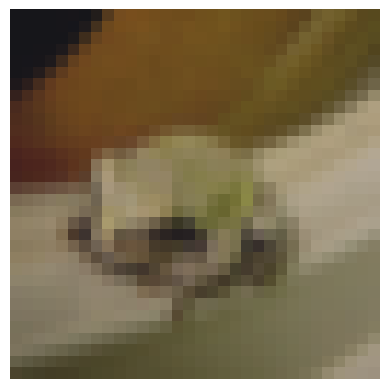

Top 16 Nearest Neighbors (in latent space)


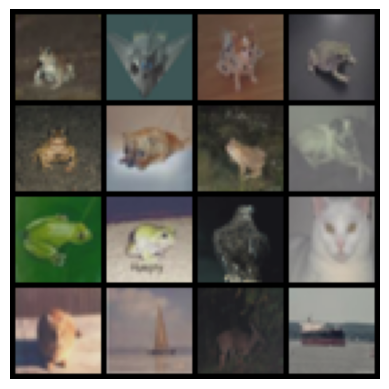

Image 4


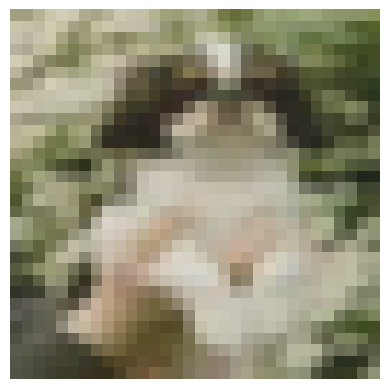

Top 16 Nearest Neighbors (in latent space)


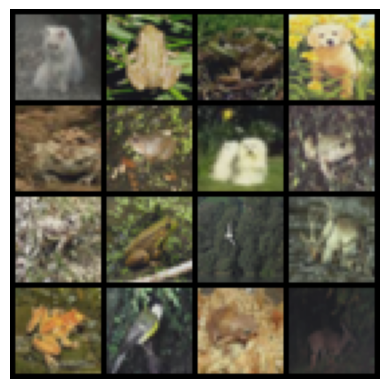

In [ ]:
display_nearest_neighbors('rotation', model, test_loader)

## Demo 3: SimCLR [[3]](https://arxiv.org/abs/2002.05709)

SimCLR is a contrastive learning framework to learn strong visual representations. An image $x$ is processed using data augmentation to produce two variants $x_i$ and $x_j$ which are both fed into encoder $f$ (a CNN) and projection head $g$ (a small MLP). The models optimize a contrastive loss to maximally align projected latents $z_i, z_j$. We consider $x_i, x_j$ as a positive pair, and any other $x_i, x_k$ pairs (i.e. different images in the same batch) are negative pairs. A visual diagram of the training procedure is shown below (from the paper).

![](https://drive.google.com/uc?id=1XW1uIkUTMSa0DZncivSYXzM5gA5FIhF6)

More formally, the loss between positive example $z_i, z_j$ is:
$$\ell_{i,j} = -\log{\frac{\exp(\text{sim}(z_i, z_j)/\tau)}{\sum_{k=1}^{2N}\mathbb{1}_{[k\neq i]}\exp(\text{sim}(z_i, z_k)/\tau)}}$$
where $\text{sim}(z_i, z_j) = z_i^Tz_j / (\left\Vert z_i \right\Vert \left\Vert z_j \right\Vert)$. The loss function can also be interpreted as a standard cross entropy loss to classify positive samples where logits are constructed using a given similarity function.

Note: A common idea in contrastive learning methods is that a larger batch means more negative samples. Therefore, these methods usually benefit the most from large-batch learning compared to other self-supervised learning tasks.

### Example Code

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from deepul_helper.resnet import resnet_v1
from deepul_helper.batch_norm import SyncBatchNorm, BatchNorm1d

# Some code adapted from https://github.com/sthalles/SimCLR
class SimCLR(nn.Module):
    metrics = ['Loss']
    metrics_fmt = [':.4e']

    def __init__(self, dataset, n_classes, dist=None):
        super().__init__()
        self.temperature = 0.5
        self.projection_dim = 128

        if dataset == 'cifar10':
            resnet = resnet_v1((3, 32, 32), 50, 1, cifar_stem=True)
            resnet = SyncBatchNorm.convert_sync_batchnorm(resnet)
            self.resnet = resnet
            self.latent_dim = 2048
        elif 'imagenet' in dataset:
            resnet = resnet_v1((3, 128, 128), 50, 1, cifar_stem=False)
            if dist is not None:
                resnet = nn.SyncBatchNorm.convert_sync_batchnorm(resnet)
            self.resnet = resnet
            self.latent_dim = 2048

        self.proj = nn.Sequential(
            nn.Linear(self.latent_dim, self.projection_dim, bias=False),
            BatchNorm1d(self.projection_dim),
            nn.ReLU(inplace=True),
            nn.Linear(self.projection_dim, self.projection_dim, bias=False),
            BatchNorm1d(self.projection_dim, center=False)
        )

        self.dataset = dataset
        self.n_classes = n_classes
        self.dist = dist

    def construct_classifier(self):
        return nn.Sequential(nn.Linear(self.latent_dim, self.n_classes))

    def forward(self, images):
        n = images[0].shape[0]
        xi, xj = images
        hi, hj = self.encode(xi), self.encode(xj) # (N, latent_dim)
        zi, zj = self.proj(hi), self.proj(hj) # (N, projection_dim)
        zi, zj = F.normalize(zi), F.normalize(zj)

        # Each training example has 2N - 2 negative samples
        # 2N total samples, but exclude the current and positive sample

        if self.dist is None:
            zis = [zi]
            zjs = [zj]
        else:
            zis = [torch.zeros_like(zi) for _ in range(self.dist.get_world_size())]
            zjs = [torch.zeros_like(zj) for _ in range(self.dist.get_world_size())]

            self.dist.all_gather(zis, zi)
            self.dist.all_gather(zjs, zj)

        z1 = torch.cat((zi, zj), dim=0) # (2N, projection_dim)
        z2 = torch.cat(zis + zjs, dim=0) # (2N * n_gpus, projection_dim)

        sim_matrix = torch.mm(z1, z2.t()) # (2N, 2N * n_gpus)
        sim_matrix = sim_matrix / self.temperature
        # Mask out same-sample terms
        n_gpus = 1 if self.dist is None else self.dist.get_world_size()
        rank = 0 if self.dist is None else self.dist.get_rank()
        sim_matrix[torch.arange(n), torch.arange(rank*n, (rank+1)*n)]  = -float('inf')
        sim_matrix[torch.arange(n, 2*n), torch.arange((n_gpus+rank)*n, (n_gpus+rank+1)*n)] = -float('inf')

        targets = torch.cat((torch.arange((n_gpus+rank)*n, (n_gpus+rank+1)*n),
                             torch.arange(rank*n, (rank+1)*n)), dim=0)
        targets = targets.to(sim_matrix.get_device()).long()

        loss = F.cross_entropy(sim_matrix, targets, reduction='sum')
        loss = loss / n
        return dict(Loss=loss), hi

    def encode(self, images):
        return self.resnet(images[0])

    def get_features(self, images):
        return self.resnet.get_features(images)


### Linear Classification
We can use the encoded vector $h_i$ as our latent representation.

In [ ]:
model, linear_classifier, train_loader, test_loader = load_model_and_data('simclr')
evaluate_accuracy(model, linear_classifier, train_loader, test_loader)

Files already downloaded and verified
Files already downloaded and verified
Train Set
Top 1 Accuracy: 90.13, Top 5 Accuracy: 99.48

Test Set
Top 1 Accuracy: 92.84, Top 5 Accuracy: 99.86



### Nearest Neighbors
Another way to evaluate our learned representation is to look at nearest neighbors to random encoded images in latent space.

Image 1


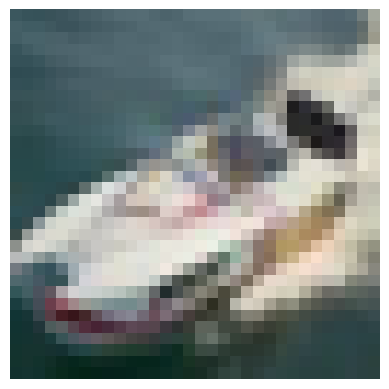

Top 16 Nearest Neighbors (in latent space)


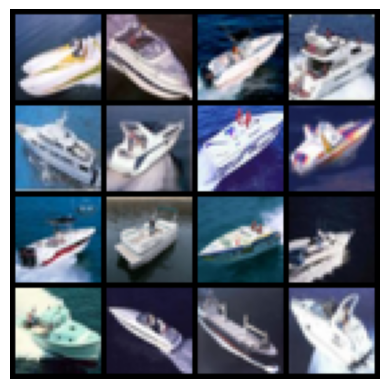

Image 2


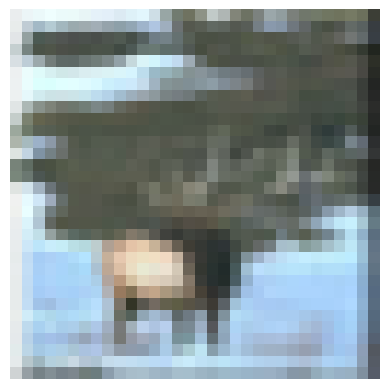

Top 16 Nearest Neighbors (in latent space)


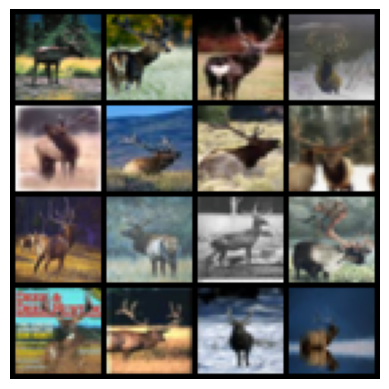

Image 3


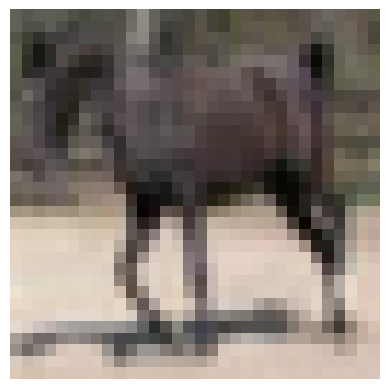

Top 16 Nearest Neighbors (in latent space)


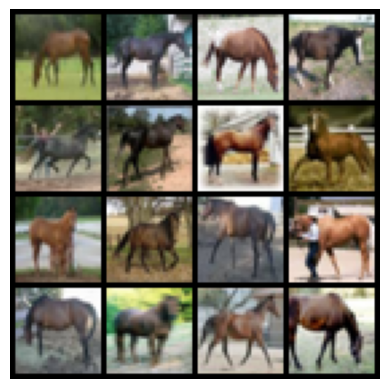

Image 4


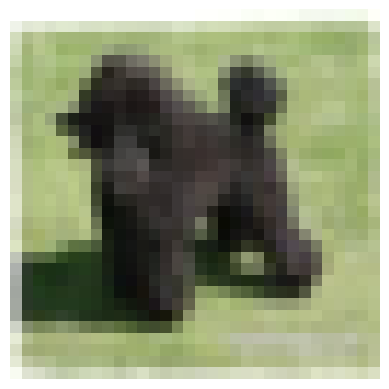

Top 16 Nearest Neighbors (in latent space)


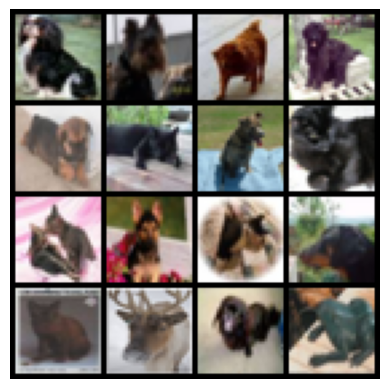

In [ ]:
display_nearest_neighbors('simclr', model, test_loader)

## Other Tasks
In addition to the above tasks, prior work has also investigated other self-superivsed tasks such as solving jigsaw puzzles [[4]](https://arxiv.org/abs/1603.09246), cycle-consistency [[5]](https://arxiv.org/abs/1903.07593), contrastive learning [[6]](https://arxiv.org/abs/1807.03748)[[7]](https://arxiv.org/abs/1905.09272)[[8]](https://arxiv.org/abs/1906.05849)[[9]](https://arxiv.org/abs/1911.05722), and patch prediction [[10]](https://arxiv.org/abs/1505.05192). See [here](https://github.com/jason718/awesome-self-supervised-learning) for a great resource on more self-supervised learning papers.

# Demo 4: Using Representations for Downstream Tasks

After pretraining a model on a self-supervised learning task, we can use it for other downstream tasks. In this demo, we use the pre-trained ResNet50 backbone from training SimCLR on a subset of ImageNet to learn a semantic segmentation model on Pascal VOC 2012. We use a simple U-Net [[11]](https://arxiv.org/abs/1505.04597) architecture with skip connections across feature maps between the SimCLR encoder and learned upsampling decoder. We do not fine-tune the SimCLR ResNet50 backbone, and only optimize the upsampling portion.

![](https://drive.google.com/uc?id=19dxxcwof0IA0jyv0VCl4rnZZf3ajA22s)

The training script can be found in `train_segmentation.py` [here](https://github.com/wilson1yan/cs294-158-ssl/blob/master/train_segmentation.py).

## Example Code

In [ ]:
# Code adapted from https://github.com/qubvel/segmentation_models.pytorch

import torch
import torch.nn as nn
import torch.nn.functional as F
from deepul_helper.resnet import NormReLU

class SegmentationModel(nn.Module):
    metrics = ['Loss']
    metrics_fmt = [':.4e']

    def __init__(self, n_classes):
        super().__init__()

        decoder_channels = (512, 256, 128, 64, 32)
        encoder_channels = (2048, 1024, 512, 256, 64) # Starting from head (resnet 50)

        # Construct decoder blocks
        in_channels = [encoder_channels[0]] + list(decoder_channels[:-1])
        skip_channels = list(encoder_channels[1:]) + [0]
        out_channels = decoder_channels
        blocks = [
            DecoderBlock(in_ch, skip_ch, out_ch)
            for in_ch, skip_ch, out_ch in zip(in_channels, skip_channels, out_channels)
        ]
        self.dec_blocks = nn.ModuleList(blocks)

        # Segmentation head for output prediction
        self.seg_head = nn.Conv2d(decoder_channels[-1], n_classes, kernel_size=3, padding=1)

    def forward(self, features, targets):
        features = features[1:] # remove first skip with same spatial resolution
        features = features[::-1] # reverse channels to start from head of encoder

        skips = features[1:]
        x = features[0]
        for i, decoder_block in enumerate(self.dec_blocks):
            skip = skips[i] if i < len(skips) else None
            x = decoder_block(x, skip)

        logits = self.seg_head(x)
        loss = F.cross_entropy(logits, targets)

        return dict(Loss=loss), logits


class DecoderBlock(nn.Module):
    def __init__(
            self,
            in_channels,
            skip_channels,
            out_channels,
    ):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels + skip_channels, out_channels,
                      kernel_size=3, padding=1),
            NormReLU((out_channels, None, None)), # only care about channel dim for BN
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            NormReLU((out_channels, None, None))
        )

    def forward(self, x, skip=None):
        x = F.interpolate(x, scale_factor=2, mode="nearest")
        if skip is not None:
            x = torch.cat([x, skip], dim=1)
        x = self.conv1(x)
        x = self.conv2(x)
        return x

## Segmentation Results
Below, we show a random subset of segmentations from the trained model. Every set of 3 images consists of the original image, the labeled segmentation, and the predicted segmentation.

Using downloaded and verified file: data/pascalvoc2012/VOCtrainval_11-May-2012.tar
Extracting data/pascalvoc2012/VOCtrainval_11-May-2012.tar to data/pascalvoc2012
Using downloaded and verified file: data/pascalvoc2012/VOCtrainval_11-May-2012.tar
Extracting data/pascalvoc2012/VOCtrainval_11-May-2012.tar to data/pascalvoc2012


/content/cs294-158-ssl/deepul_helper/demos.py:162: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(osp.join('results', 'imagenet100_simclr', 'seg_model_best.

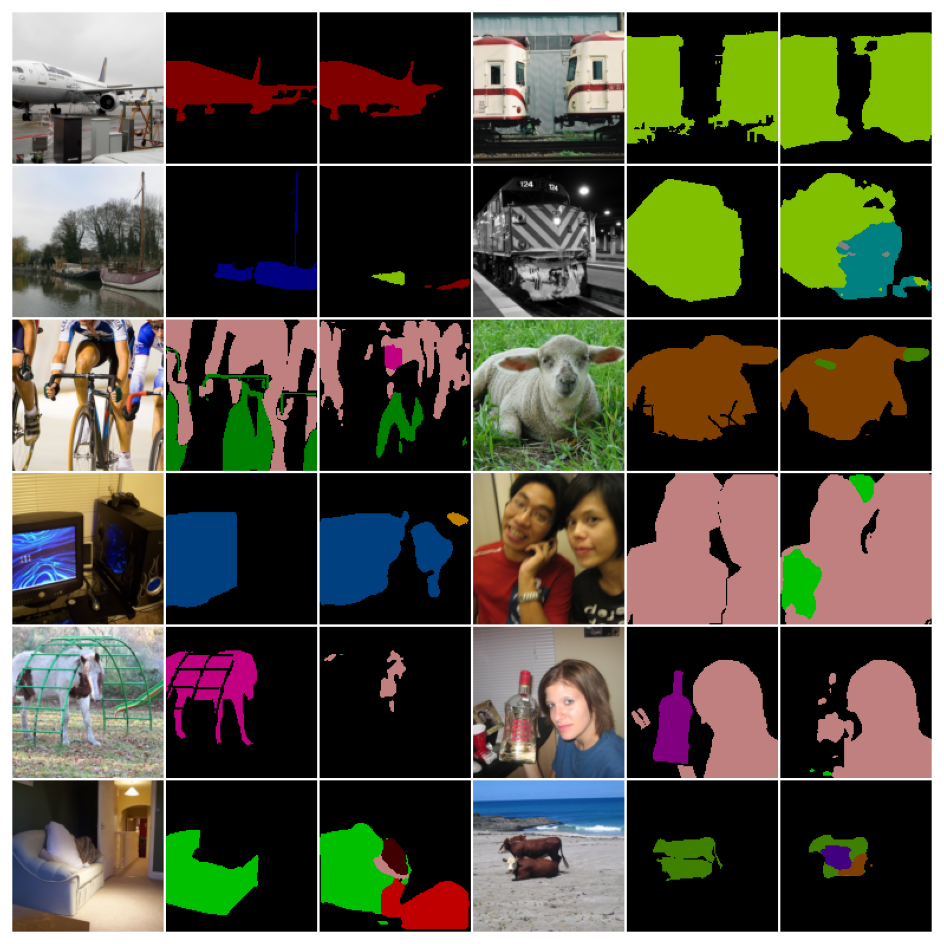

In [ ]:
from deepul_helper.demos import show_segmentation
show_segmentation()

# Demo 5: Avoiding Trivial Representations in Self-Supervised Tasks

When designing a self-supervised learning task, it is important to make sure that no trivial solutions exists. In general, a learned solution is trivial if the model is able to successfully complete its task by taking advantage of low-level features. As a result, it doesn't learn a good representation so downstream performance is bad.

For example, in the jigsaw [[4]](https://arxiv.org/abs/1603.09246) task, a model can "cheat" by just looking at the boundary textures of the jigsaw pieces, or following and matching straight lines across different pieces. These issues can generally be fixed by ranndom cropping, shifting, and spacially jittering.

We look at two other less obvious aspects of images that may reduce performance.

## Chromatic Aberration

Chromatic aberration occurs when the different focal lengths of light results in the light not meeting all at the same point.
![from wikipedia](https://drive.google.com/uc?id=1PYGoQWnH0aAeiE_8t4ef5WDcq1UIQQ5t)

A example of very apparent chromatic aberration is shown below, where the green and magenta colors are clearly offset with each other:

![](https://drive.google.com/uc?id=1M1B6kV6ddBwyJse3FQT8_XBTeqs5s5WL)

Chromatic aberration generally becomes a problem in patch-based self-supervised learning tasks that design, such as solving jigsaw puzzles, or predicintg the correct location of a patch in an image In this case, the model can take advantage of the low-level chromatic aberration features to get a strong idea of where the patch is located without understanding the actual context.

Below is a quick demo of chromatic aberration in more realistic images, and possible fixes. Note that in general, chromatic aberration is fairly hard to spot with the naked eye, but deep learning models are still able to use it to their advantage.

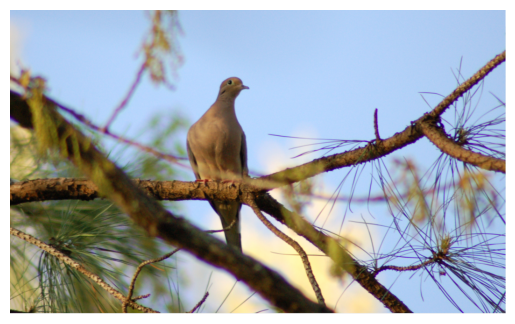

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# You can see some chromatic aberration in the purple fringes around the branches

image = Image.open('sample_images/chrom_ab_demo.png')
plt.figure()
plt.axis('off')
plt.imshow(image)
plt.show()

Chromatic aberration is generally fixed through conversion to grayscale, or color dropping. Color dropping works by dropping 2 of the color channels and replacing them with random noise uniform or Gaussian noise.

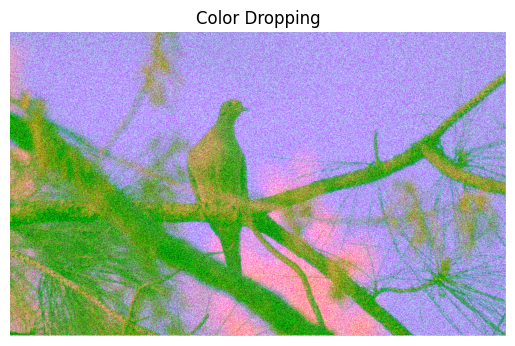

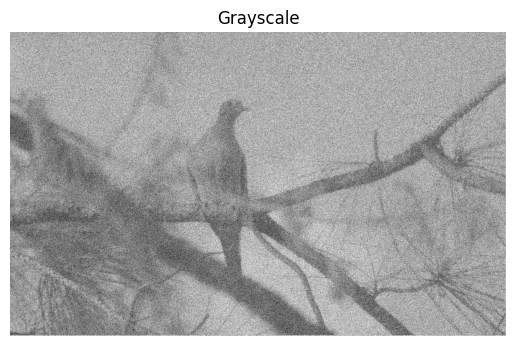

In [ ]:
import numpy as np

# Color Dropping
# We will drop all channels except R
image_cpy = image.copy()
pixels = image_cpy.load()

arr = np.array(image_cpy)
std_R = np.std(arr[:, :, 0])
mean_G, mean_B = np.mean(arr[:, :, 1]), np.mean(arr[:, :, 2])

for i in range(image.size[0]):
  for j in range(image.size[1]):
    p = pixels[i, j] # (R, G, B, A)
    R, A = p[0], p[3]
    G = int(np.random.randn() * std_R + mean_G)
    B = int(np.random.randn() * std_R + mean_B)
    pixels[i, j] = (R, G, p[2], p[3])

plt.figure()
plt.title('Color Dropping')
plt.axis('off')
plt.imshow(image_cpy)
plt.show()

# Grayscale
image_cpy2 = image.copy()
pixels2 = image_cpy2.load()

for i in range(image.size[0]):
  for j in range(image.size[1]):
    p = pixels[i, j]
    G = int(0.3 * p[0] + 0.59 * p[1] + 0.11 * p[2])
    pixels2[i, j] = (G, G, G, 255)

plt.figure()
plt.title('Grayscale')
plt.axis('off')
plt.imshow(image_cpy2)
plt.show()

## Color Intensity Histograms

In the SimCLR paper, the authors show that the histogram of color intensities of different patches within the same image have very similar histograms, which may degrade training by encouraging models to look at low-level (pixel intensity) features to solve self-supervised tasks that involve matching positive patches of the same image.

Below, we run a similar demo to what was demonstrated in the paper

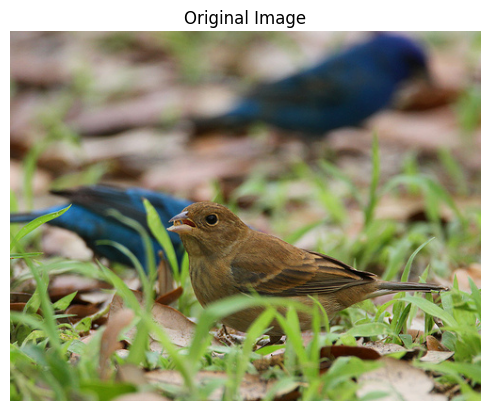

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open('sample_images/n01537544_19414.JPEG')
plt.figure()
plt.title('Original Image')
plt.axis('off')
plt.imshow(image)
plt.show()

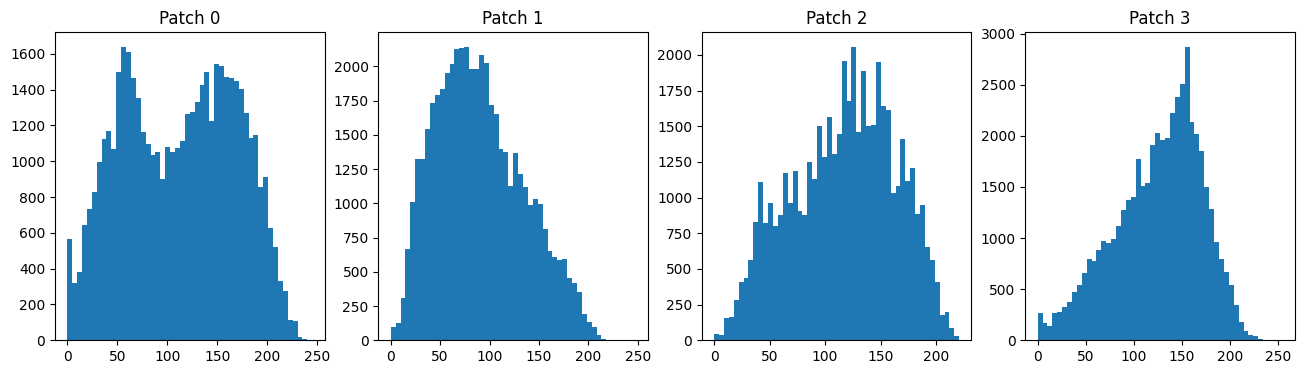

In [ ]:
import numpy as np
arr = np.array(image)
H, W, _ = arr.shape

fig, axs = plt.subplots(1, 4, figsize=(16, 4))
for i in range(4):
  r = np.random.randint(0, H - 128)
  c = np.random.randint(0, W - 128)
  patch = arr[r:r+128, c:c+128]

  axs[i].set_title(f'Patch {i}')
  axs[i].hist(patch.reshape(-1), bins=50)
plt.show()

Now we apply color jittering to mitigate this effect

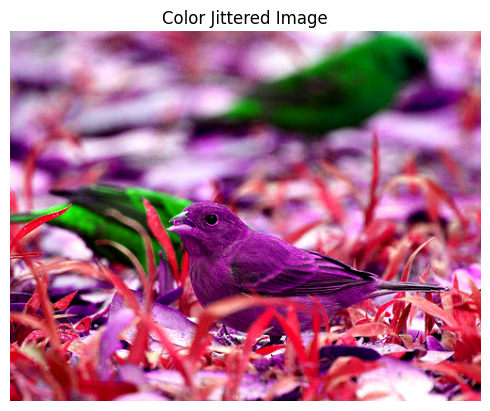

In [ ]:
from torchvision import transforms

color_jitter = transforms.ColorJitter(0.3, 0.3, 0.3, 0.3)
jitter_img = color_jitter(image)

image = Image.open('sample_images/n01537544_19414.JPEG')
plt.figure()
plt.title('Color Jittered Image')
plt.axis('off')
plt.imshow(jitter_img)
plt.show()

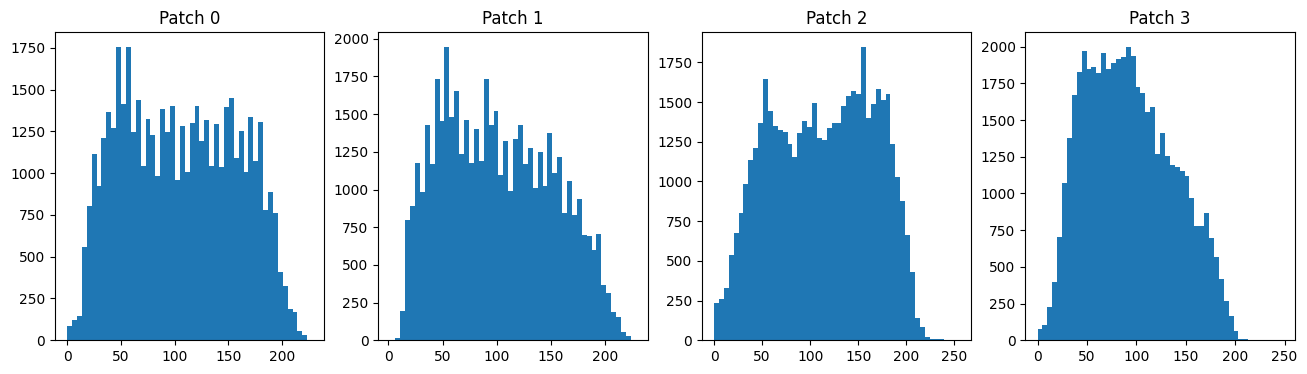

In [ ]:
arr = np.array(image)
H, W, _ = arr.shape

fig, axs = plt.subplots(1, 4, figsize=(16, 4))
for i in range(4):
  r = np.random.randint(0, H - 128)
  c = np.random.randint(0, W - 128)
  patch = arr[r:r+128, c:c+128]

  axs[i].set_title(f'Patch {i}')
  axs[i].hist(patch.reshape(-1), bins=50)
plt.show()

# Answers to lab questions

In [ ]:
from deepul_helper.demos import load_model_and_data, evaluate_accuracy, display_nearest_neighbors, show_context_encoder_inpainting

%matplotlib inline

## Question 1: Accuracy comparaison of demos

In [44]:
from deepul_helper.demos import evaluate_classifier
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
# This function is an adaptation of evaluate accuracy in the github page: deepul_helper.demos
def evaluate_accuracy_adaptation(demo_name, model, linear_classifier, train_loader, test_loader):
    # Accuracies
    accuracies = []

    # Evaluate
    train_acc1, train_acc5 = evaluate_classifier(model, linear_classifier, train_loader)
    test_acc1, test_acc5 = evaluate_classifier(model, linear_classifier, test_loader)

    accuracies.append({'model': demo_name, 'model_stage':'training', 'top1_accuracy': train_acc1, 'top5_accuracy': train_acc5})
    accuracies.append({'model': demo_name, 'model_stage':'testing', 'top1_accuracy': test_acc1, 'top5_accuracy': test_acc5})

    return accuracies

In [46]:
# Loading all models, before evaluation

# Demo 1
model_demo1, linear_classifier_demo1, train_loader_demo1, test_loader_demo1 = load_model_and_data('context_encoder')

# Demo 2
model_demo2, linear_classifier_demo2, train_loader_demo2, test_loader_demo2 = load_model_and_data('rotation')

# Demo 3
model_demo3, linear_classifier_demo3, train_loader_demo3, test_loader_demo3 = load_model_and_data('simclr')

Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/content/cs294-158-ssl/deepul_helper/demos.py:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickli

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [47]:
# List to store the resulting accuracies for each model
results_training = []
results_testing = []

# Evaluate accuracy for each model
res_demo1 = evaluate_accuracy_adaptation("context_encoder", model_demo1, linear_classifier_demo1, train_loader_demo1, test_loader_demo1)
res_demo2 = evaluate_accuracy_adaptation("rotation", model_demo2, linear_classifier_demo2, train_loader_demo2, test_loader_demo2)
res_demo3 = evaluate_accuracy_adaptation("simclr", model_demo3, linear_classifier_demo3, train_loader_demo3, test_loader_demo3)

results_training.append(res_demo1[0])
results_training.append(res_demo2[0])
results_training.append(res_demo3[0])

results_testing.append(res_demo1[1])
results_testing.append(res_demo2[1])
results_testing.append(res_demo3[1])

# Convert results to DataFrame for tabular display
results_training_df = pd.DataFrame(results_training)
print(results_training_df)

# Convert results to DataFrame for tabular display
results_testing_df = pd.DataFrame(results_testing)
print(results_testing_df)

             model model_stage  top1_accuracy  top5_accuracy
0  context_encoder    training         53.236         94.094
1         rotation    training         79.246         99.164
2           simclr    training         90.172         99.474
             model model_stage  top1_accuracy  top5_accuracy
0  context_encoder     testing          45.77          90.29
1         rotation     testing          79.91          99.12
2           simclr     testing          92.84          99.86


In [48]:
# Training accuracies table
display(results_training_df)

model model_stage  top1_accuracy  top5_accuracy
0  context_encoder    training         53.236         94.094
1         rotation    training         79.246         99.164
2           simclr    training         90.172         99.474

<ipython-input-53-f9657dbce9af>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
<ipython-input-53-f9657dbce9af>:17: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  ax = sns.barplot(


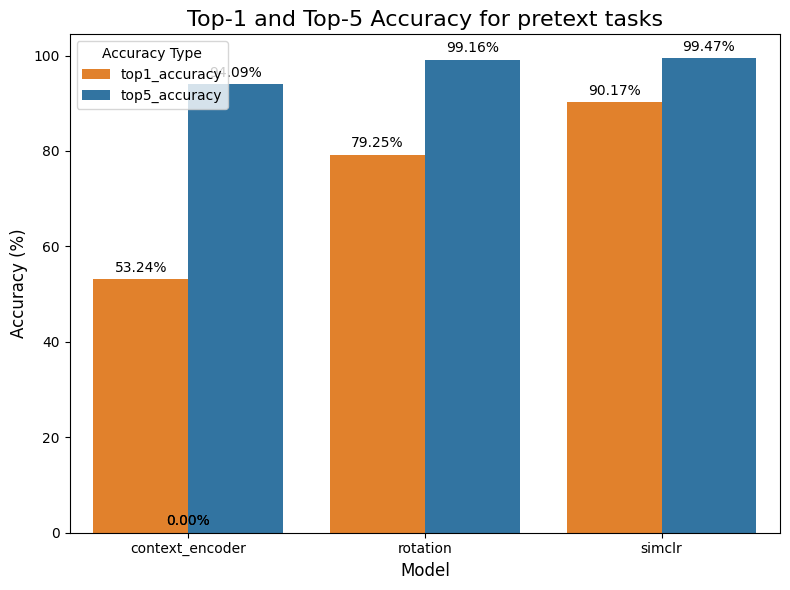

In [53]:
# For training
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Melt the dataframe for better plotting
results_melted = results_training_df.melt(
    id_vars=["model", "model_stage"], value_vars=["top1_accuracy", "top5_accuracy"],
    var_name="accuracy_type", value_name="accuracy"
)

# Define custom colors (orange, blue, dark, dark pink)
palette = ["#FF7F0E", "#1F77B4", "#4B0082", "#D6008C"]  # orange, blue, dark purple, dark pink

# Plotting
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=results_melted,
    x="model", y="accuracy", hue="accuracy_type",
    palette=palette, ci=None, hue_order=["top1_accuracy", "top5_accuracy"]
)

# Add percentages as text on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                xytext=(0, 8),
                textcoords='offset points',
                ha='center', va='center', fontsize=10, color='black')

# Adding titles and labels
plt.title("Top-1 and Top-5 Accuracy for pretext tasks", fontsize=16)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.legend(title="Accuracy Type", fontsize=10)

# Display plot
plt.tight_layout()
plt.show()

In [50]:
# Testing accuracies table
display(results_testing_df)

model model_stage  top1_accuracy  top5_accuracy
0  context_encoder     testing          45.77          90.29
1         rotation     testing          79.91          99.12
2           simclr     testing          92.84          99.86

<ipython-input-52-54058d9da7c8>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
<ipython-input-52-54058d9da7c8>:17: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  ax = sns.barplot(


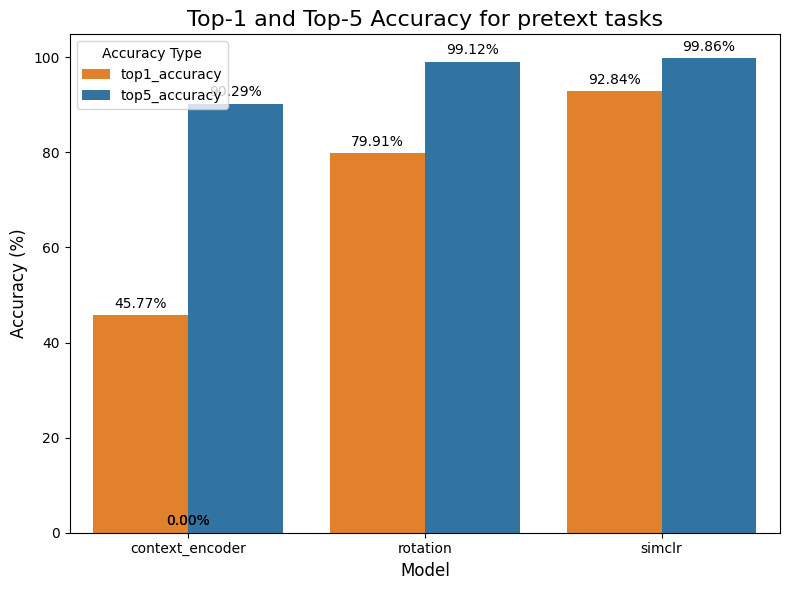

In [52]:
# For training
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Melt the dataframe for better plotting
results_melted = results_testing_df.melt(
    id_vars=["model", "model_stage"], value_vars=["top1_accuracy", "top5_accuracy"],
    var_name="accuracy_type", value_name="accuracy"
)

# Define custom colors (orange, blue, dark, dark pink)
palette = ["#FF7F0E", "#1F77B4", "#4B0082", "#D6008C"]  # orange, blue, dark purple, dark pink

# Plotting
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=results_melted,
    x="model", y="accuracy", hue="accuracy_type",
    palette=palette, ci=None, hue_order=["top1_accuracy", "top5_accuracy"]
)

# Add percentages as text on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                xytext=(0, 8),
                textcoords='offset points',
                ha='center', va='center', fontsize=10, color='black')

# Adding titles and labels
plt.title("Top-1 and Top-5 Accuracy for pretext tasks", fontsize=16)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.legend(title="Accuracy Type", fontsize=10)

# Display plot
plt.tight_layout()
plt.show()

## Question 2: Evaluation on another dataset

Fashion-MNIST is a dataset of the clothes brand Zalando. It groups articles from this brand. The images are 28x28 in grayscale, meaning we will have to resize them and convert them to RGB.

In [54]:
from deepul_helper.demos import load_model_and_data, evaluate_accuracy, display_nearest_neighbors, show_context_encoder_inpainting, evaluate_classifier

%matplotlib inline

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision.transforms import Compose, ToTensor, Normalize, Resize
import pandas as pd

In [55]:
# This function is an adaptation of the function get_dataset in gihub page
def get_transform_fashionMNIST(dataset, task):
    s = 0.5
    transform = None
    if task == 'context_encoder':
      transform = transforms.Compose([
          transforms.Resize(128),
          lambda x: x.convert("RGB"),  # Convert grayscale to RGB
          transforms.ToTensor(),
          transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))
      ])
    elif task == 'rotation':
      transform = transforms.Compose([
          transforms.Grayscale(num_output_channels=3),  # Convert to 3 channels
          transforms.Resize((32,32)),
          transforms.ToTensor(),
          transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))
      ])

    elif task == 'simclr':
      transform = transforms.Compose([
                    transforms.Grayscale(num_output_channels=3),  # Convert to 3 channels
                    transforms.Resize((32,32)),
                    transforms.ToTensor(),
                    transforms.Normalize([0.4914, 0.4822, 0.4465], [0.2023, 0.1994, 0.2010])
                ])
    else:
      raise Exception('Invalid task:', task)

    return transform


In [16]:
# This function is an adaptation of evaluate accuracy in the github page: deepul_helper.demos
def evaluate_accuracy_adapt(dataset_name, demo_name, model, linear_classifier, train_loader, test_loader):
    # Accuracies
    accuracies = []

    # Evaluate
    train_acc1, train_acc5 = evaluate_classifier(model, linear_classifier, train_loader)
    test_acc1, test_acc5 = evaluate_classifier(model, linear_classifier, test_loader)

    accuracies.append({'dataset': dataset_name,'pretext': demo_name, 'top1_accuracy': test_acc1, 'top5_accuracy': test_acc5})

    return accuracies

For Context Encoder pretext

In [17]:
# For context Encoder pretext
transform_ce = get_transform_fashionMNIST(dataset='fashion_mnist', task='context_encoder')
# Load the Fashion-MNIST dataset
fashion_mnist_test_ce = datasets.FashionMNIST(root="./data", train=False, download=True, transform=transform_ce)

# Create DataLoaders for training and testing
test_loader_f_ce = DataLoader(fashion_mnist_test_ce, batch_size=128, shuffle=False) # Batch size: 128 for cifar-10

In [18]:
model_demo1, linear_classifier_demo1, train_loader_demo1, test_loader_demo1 = load_model_and_data('context_encoder')
accuracy_ce_f = evaluate_accuracy_adapt("fashion-MNIST","Context encoder",  model_demo1, linear_classifier_demo1, train_loader_demo1, test_loader_f_ce)
accuracy_ce = evaluate_accuracy_adapt("Cifar-10", "Context encoder", model_demo1, linear_classifier_demo1, train_loader_demo1, test_loader_demo1)

Files already downloaded and verified
Files already downloaded and verified


For rotation pretext

In [19]:
transform_rotation = get_transform_fashionMNIST(dataset='fashion_mnist', task='rotation')
# Load the Fashion-MNIST dataset
fashion_mnist_test_rotation = datasets.FashionMNIST(root="./data", train=False, download=True, transform=transform_rotation)

# Create DataLoaders for training and testing
test_loader_f_rotation = DataLoader(fashion_mnist_test_rotation, batch_size=128, shuffle=False) # Batch size: 128 for cifar-10

In [20]:
model_rotation, linear_classifier_rotation, train_loader_rotation, test_loader_demo2 = load_model_and_data('rotation')
accuracy_f_rotation = evaluate_accuracy_adapt("fashion-MNIST", "Rotation", model_rotation, linear_classifier_rotation, train_loader_rotation, test_loader_f_rotation)
accuracy_rotation = evaluate_accuracy_adapt("Cifar-10", "Rotation", model_rotation, linear_classifier_rotation, train_loader_rotation, test_loader_demo2)

Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/content/cs294-158-ssl/deepul_helper/demos.py:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickli

For simclr pretext

In [29]:
class PairedTransformDataset(torch.utils.data.Dataset):
    def __init__(self, base_dataset, transform):
        self.base_dataset = base_dataset
        self.transform = transform

    def __len__(self):
        return len(self.base_dataset)

    def __getitem__(self, idx):
        # Get the image and label from the base dataset
        image, label = self.base_dataset[idx]

        # Apply the transform twice to create two different views
        xi = self.transform(image)
        xj = self.transform(image)

        return (xi, xj), label  # Return a tuple of two views and the label

In [30]:
# Define the transform for Fashion-MNIST, compatible with SimCLR
transform_sim = get_transform_fashionMNIST(dataset='fashion_mnist', task='simclr')

# Load the Fashion-MNIST dataset and wrap it with the paired dataset
fashion_mnist_test = datasets.FashionMNIST(root="./data", train=False, download=True, transform=None)
paired_fashion_mnist_test = PairedTransformDataset(fashion_mnist_test, transform_sim)

# Create DataLoader with the paired dataset
test_loader_f_sim = DataLoader(paired_fashion_mnist_test, batch_size=128, shuffle=False)

In [31]:
model_sim, linear_classifier_sim, train_loader_sim, test_loader_demo3 = load_model_and_data('simclr')
accuracy_f_sim = evaluate_accuracy_adapt("fashion-MNIST", "Simclr", model_sim, linear_classifier_sim, train_loader_sim, test_loader_f_sim)
accuracy_sim = evaluate_accuracy_adapt("Cifar-10", "Simclr", model_sim, linear_classifier_sim, train_loader_sim, test_loader_demo3)

Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/content/cs294-158-ssl/deepul_helper/demos.py:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickli

Comparaison

In [35]:
accuracies_of_all_pretexts_datasets = pd.DataFrame(accuracy_ce_f + accuracy_ce + accuracy_f_rotation + accuracy_rotation + accuracy_f_sim + accuracy_sim)
display(accuracies_of_all_pretexts_datasets)

dataset          pretext  top1_accuracy  top5_accuracy
0  fashion-MNIST  Context encoder           8.81          41.57
1       Cifar-10  Context encoder          45.77          90.29
2  fashion-MNIST         Rotation           8.29          39.55
3       Cifar-10         Rotation          79.91          99.12
4  fashion-MNIST           Simclr          10.79          49.73
5       Cifar-10           Simclr          92.84          99.86

<ipython-input-58-22f25e40a1f7>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-58-22f25e40a1f7>:20: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.barplot(


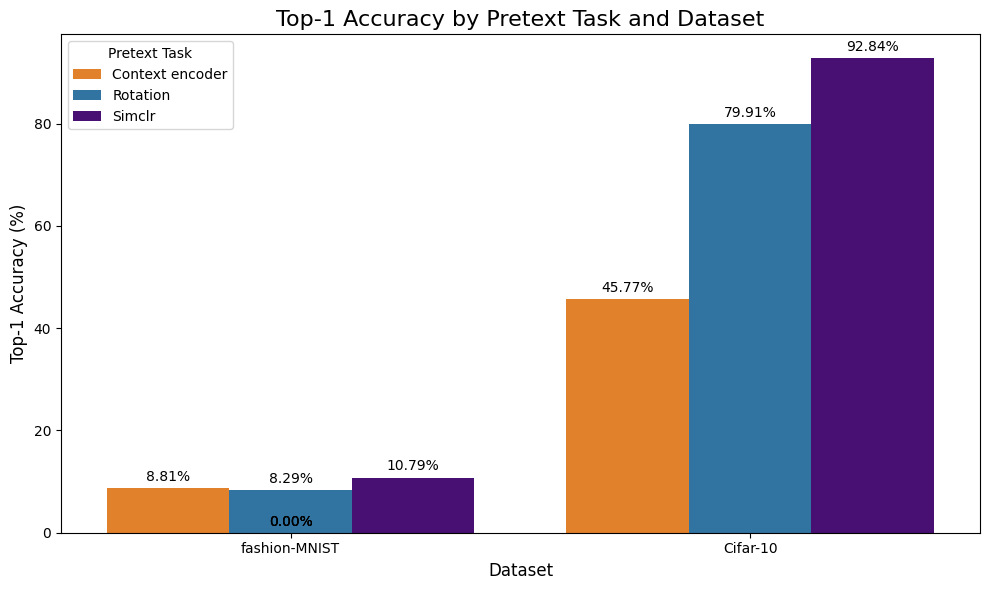

<ipython-input-58-22f25e40a1f7>:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-58-22f25e40a1f7>:42: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.barplot(


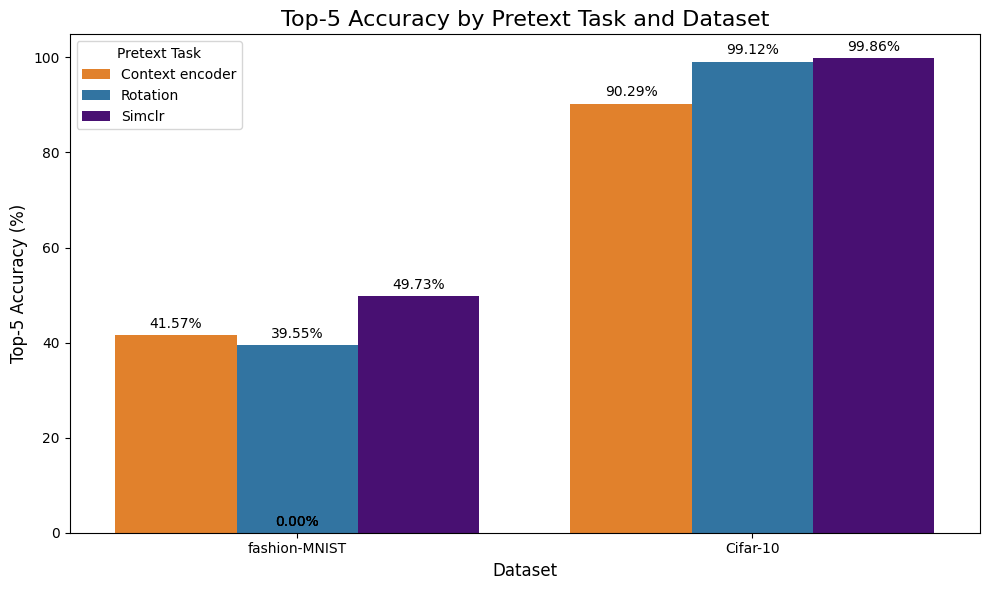

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create the DataFrame from the provided data
data = {
    "dataset": ["fashion-MNIST", "Cifar-10", "fashion-MNIST", "Cifar-10", "fashion-MNIST", "Cifar-10"],
    "pretext": ["Context encoder", "Context encoder", "Rotation", "Rotation", "Simclr", "Simclr"],
    "top1_accuracy": [8.81, 45.77, 8.29, 79.91, 10.79, 92.84],
    "top5_accuracy": [41.57, 90.29, 39.55, 99.12, 49.73, 99.86]
}

accuracies_of_all_pretexts_datasets = pd.DataFrame(data)

# Set custom colors (orange, blue, dark purple, and dark pink)
palette = ["#FF7F0E", "#1F77B4", "#4B0082", "#D6008C"]  # orange, blue, dark purple, dark pink

# Plotting for Top-1 Accuracy
plt.figure(figsize=(10, 6))
sns.barplot(
    data=accuracies_of_all_pretexts_datasets,
    x="dataset", y="top1_accuracy", hue="pretext",
    palette=palette, ci=None, hue_order=["Context encoder", "Rotation", "Simclr"]
)
# Add percentages as text on the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}%',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       xytext=(0, 8),
                       textcoords='offset points',
                       ha='center', va='center', fontsize=10, color='black')

plt.title("Top-1 Accuracy by Pretext Task and Dataset", fontsize=16)
plt.xlabel("Dataset", fontsize=12)
plt.ylabel("Top-1 Accuracy (%)", fontsize=12)
plt.legend(title="Pretext Task", fontsize=10)
plt.tight_layout()
plt.show()

# Plotting for Top-5 Accuracy
plt.figure(figsize=(10, 6))
sns.barplot(
    data=accuracies_of_all_pretexts_datasets,
    x="dataset", y="top5_accuracy", hue="pretext",
    palette=palette, ci=None, hue_order=["Context encoder", "Rotation", "Simclr"]
)
# Add percentages as text on the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}%',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       xytext=(0, 8),
                       textcoords='offset points',
                       ha='center', va='center', fontsize=10, color='black')

plt.title("Top-5 Accuracy by Pretext Task and Dataset", fontsize=16)
plt.xlabel("Dataset", fontsize=12)
plt.ylabel("Top-5 Accuracy (%)", fontsize=12)
plt.legend(title="Pretext Task", fontsize=10)
plt.tight_layout()
plt.show()

## Question 3: Implement a pretext task

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, Dataset
import numpy as np

In [ ]:
# Function to select query and candidate patches with relative position label
def select_query_and_candidate(grid_size=4):
    query_row, query_col = np.random.randint(0, grid_size, size=2) # select a query patch randomly
    # This is the relative position
    relative_positions = {
        'top': (-1, 0, 0),
        'top_right': (-1, 1, 1),
        'right': (0, 1, 2),
        'bottom_right': (1, 1, 3),
        'bottom': (1, 0, 4),
        'bottom_left': (1, -1, 5),
        'left': (0, -1, 6),
        'top_left': (-1, -1, 7)
    }

    candidates = []
    for pos, (dr, dc, label) in relative_positions.items():
        candidate_row = query_row + dr
        candidate_col = query_col + dc
        if 0 <= candidate_row < grid_size and 0 <= candidate_col < grid_size:
            candidates.append((candidate_row, candidate_col, label))

    candidate_row, candidate_col, label = candidates[np.random.randint(len(candidates))] # select a candidate among the condidates randomly

    return (query_row, query_col), (candidate_row, candidate_col), label

# Function to extract patches in an image (we will use a grid of 4x4 and hence we'll have patches of 8x8 pixels)
def extract_patches(image, patch_size=8, grid_size=4):

    # Convert images from tensors to numpy arrays in order to extract patches
    if isinstance(image, torch.Tensor):
        image = image.permute(1, 2, 0).cpu().numpy()

    # extract patches
    patches = []
    if image.shape[0] == 32 and image.shape[1] == 32:
        for i in range(0, image.shape[0], patch_size):
            for j in range(0, image.shape[1], patch_size):
                patch = image[i:i+patch_size, j:j+patch_size]
                if patch.shape[0] == 8 and patch.shape[1] == 8:
                    patches.append(patch)

    # convert patches of np arrays
    patches = np.array(patches).reshape(grid_size, grid_size, patch_size, patch_size, 3)
    # select the query patch, candidate patch and the label using the function above
    query_patch, candidate_patch, label = select_query_and_candidate(grid_size)
    query_patch = patches[query_patch[0], query_patch[1]]
    candidate_patch = patches[candidate_patch[0], candidate_patch[1]]

    return query_patch, candidate_patch, label

In [ ]:
# Class to extract query patches, candidate and labels
class RelativePositionDataset(Dataset):
    def __init__(self, images, transform=None):
        self.images = images
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image, _ = self.images[idx] # The cifar 10 is a tuple of (image, target)
        query_patch, candidate_patch, label = extract_patches(image) # Use the function above to extract query, candidate and labels

        # Put the data in GPU or CPU otherwise and convert them to tensors since they were numpy arrays
        query_patch = torch.tensor(query_patch, dtype=torch.float32).permute(2, 0, 1).to(device)
        candidate_patch = torch.tensor(candidate_patch, dtype=torch.float32).permute(2, 0, 1).to(device)
        label = torch.tensor(label, dtype=torch.long).to(device)

        return query_patch, candidate_patch, label

In [ ]:
# We have reduced the complexity of context encoder and adjusted it to be relevant to the task
# of position prediction
class PatchPositionPredictor(nn.Module):
    def __init__(self, n_classes=8):
        super().__init__()
        input_channels = 3
        self.latent_dim = 512

        # Encoder to extract patch features
        self.encoder = nn.Sequential(
            nn.Conv2d(input_channels, 16, 3, stride=1, padding=1),
            nn.BatchNorm2d(16),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(16, 32, 3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(32, self.latent_dim, 8)
        )

        # Classifier to predict relative position
        self.classifier = nn.Sequential(
            nn.Linear(2 * self.latent_dim, 512),
            nn.ReLU(inplace=True),
            nn.Linear(512, n_classes)
        )

    def forward(self, query_patch, candidate_patch):
        query_feature = self.encoder(query_patch).view(query_patch.size(0), -1)
        candidate_feature = self.encoder(candidate_patch).view(candidate_patch.size(0), -1)
        combined_features = torch.cat([query_feature, candidate_feature], dim=1)
        position_pred = self.classifier(combined_features)
        return position_pred


In [ ]:
# Function to train the model
def train_the_model(epochs=10, learning_rate=0.001, train_loader=None, val_loader=None):
    global losses, val_accuracies
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in range(epochs):
        model.train()
        for query_patch, candidate_patch, label in train_loader:
            query_patch, candidate_patch, label = query_patch.to(device), candidate_patch.to(device), label.to(device)
            optimizer.zero_grad()
            predictions = model(query_patch, candidate_patch)
            loss = criterion(predictions, label)
            loss.backward()
            optimizer.step()

        print(f"Epoch {epoch + 1}, Loss: {loss.item()}")
        losses.append(loss.item())

        if val_loader is not None:
            acc = evaluate_model(val_loader)
            val_accuracies.append(acc)

# Function to evaluate the model
def evaluate_model(val_loader):
    model.eval() #evaluate the model
    correct = 0
    total = 0
    with torch.no_grad():
        for query_patch, candidate_patch, label in val_loader:
            query_patch, candidate_patch, label = query_patch.to(device), candidate_patch.to(device), label.to(device)
            predictions = model(query_patch, candidate_patch)
            _, predicted = torch.max(predictions, 1)
            total += label.size(0)
            correct += (predicted == label).sum().item()

    accuracy = 100 * correct / total

    print(f"Accuracy: {100 * correct / total:.2f}%")
    return accuracy

# Function for test
def test_the_model(test_loader):
    test_accuracy = evaluate_model(test_loader)
    print(f"Test Accuracy: {test_accuracy:.2f}%")
    return test_accuracy


In [ ]:
# Set device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instantiate and move model to the correct device (GPU if available or CPU)
model = PatchPositionPredictor(n_classes=8).to(device)

# Transformations for CIFAR-10
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 data
cifar10_train = datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)

Files already downloaded and verified


In [ ]:
# Split into train and validation sets (80% train, 10% validation, 10% test)
train_size = int(0.8 * len(cifar10_train))
val_size = int(0.1* len(cifar10_train))
test_size = int(0.1* len(cifar10_train))
train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(cifar10_train, [train_size, val_size, test_size])

# Create DataLoaders for training, validation, and testing
train_loader = DataLoader(RelativePositionDataset(train_dataset), batch_size=64, shuffle=True)#, num_workers=4
val_loader = DataLoader(RelativePositionDataset(val_dataset), batch_size=64, shuffle=False)
test_loader = DataLoader(RelativePositionDataset(test_dataset), batch_size=64, shuffle=False)

In [ ]:
# For visulizations later
val_accuracies = []
losses = []

# Train the model
train_the_model(epochs=10, learning_rate=0.001, train_loader=train_loader, val_loader=val_loader)

Epoch 1, Loss: 1.1907002925872803
Accuracy: 47.98%
Epoch 2, Loss: 1.115861415863037
Accuracy: 55.14%
Epoch 3, Loss: 0.9648690223693848
Accuracy: 59.24%
Epoch 4, Loss: 1.1791844367980957
Accuracy: 60.34%
Epoch 5, Loss: 0.8001233339309692
Accuracy: 61.90%
Epoch 6, Loss: 0.9927769899368286
Accuracy: 62.10%
Epoch 7, Loss: 1.027471661567688
Accuracy: 63.40%
Epoch 8, Loss: 0.8771651983261108
Accuracy: 62.64%
Epoch 9, Loss: 0.8201764225959778
Accuracy: 64.72%
Epoch 10, Loss: 1.17792809009552
Accuracy: 63.76%


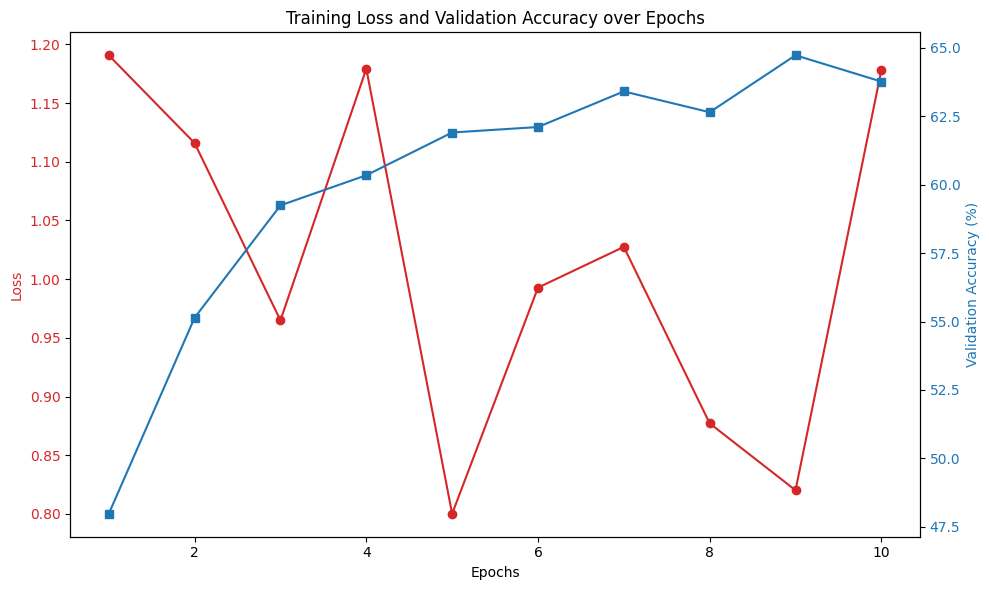

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Your training results data
training_res = pd.DataFrame({
    'epoch': range(1, 11),
    'loss': losses,
    'Validation accuracy': val_accuracies
})

# Strip any leading or trailing spaces from column names, if necessary
training_res.columns = training_res.columns.str.strip()

# Create the figure and axes for the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the training loss on the left y-axis
ax1.plot(training_res['epoch'], training_res['loss'], color='tab:red', label='Training Loss', marker='o')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Creating a second y-axis to plot validation accuracy
ax2 = ax1.twinx()
ax2.plot(training_res['epoch'], training_res['Validation accuracy'], color='tab:blue', label='Validation Accuracy', marker='s')
ax2.set_ylabel('Validation Accuracy (%)', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Title and show the plot
plt.title('Training Loss and Validation Accuracy over Epochs')
fig.tight_layout()  # To prevent overlap of y-axis labels
plt.show()

In [ ]:
# Test the model
test_accuracy_cifar10 = test_the_model(test_loader)

Accuracy: 62.62%
Test Accuracy: 62.62%


## Question 4 : Test the performance on fashion-MNIST

In [ ]:
# Import these in case
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision.transforms import Compose, ToTensor, Normalize, Resize

In [ ]:
# Adapt this class to fashionMNIST
class RelativePositionDatasetFashionMNIST(Dataset):
    def __init__(self, images, transform=None):
        self.images = images
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image, _ = self.images[idx]  # Unpacking the tuple (image, label)

        query_patch, candidate_patch, label = extract_patches(image)  # Extract patches as before

        # Convert to torch tensors and return
        query_patch = torch.tensor(query_patch, dtype=torch.float32).permute(2, 0, 1).to(device)
        candidate_patch = torch.tensor(candidate_patch, dtype=torch.float32).permute(2, 0, 1).to(device)
        label = torch.tensor(label, dtype=torch.long).to(device)

        return query_patch, candidate_patch, label

In [ ]:
# Define transformation to resize and convert to RGB
transform = Compose([
    Resize(32),  # Resize to 32x32 to match the model's expected input
    lambda x: x.convert("RGB"),  # Convert grayscale to RGB
    ToTensor(),
    Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize to [-1, 1] range (similar to CIFAR-10)
])

# Load the Fashion-MNIST dataset
fashion_mnist_test = datasets.FashionMNIST(root="./data", train=False, download=True, transform=transform)

# Create DataLoaders for training and testing
test_loader_f = DataLoader(RelativePositionDatasetFashionMNIST(fashion_mnist_test), batch_size=64, shuffle=False)#, num_workers=4

In [ ]:
# Evaluate the model
test_accuracy_fashionMNIST = test_the_model(test_loader_f)

Accuracy: 44.64%
Test Accuracy: 44.64%


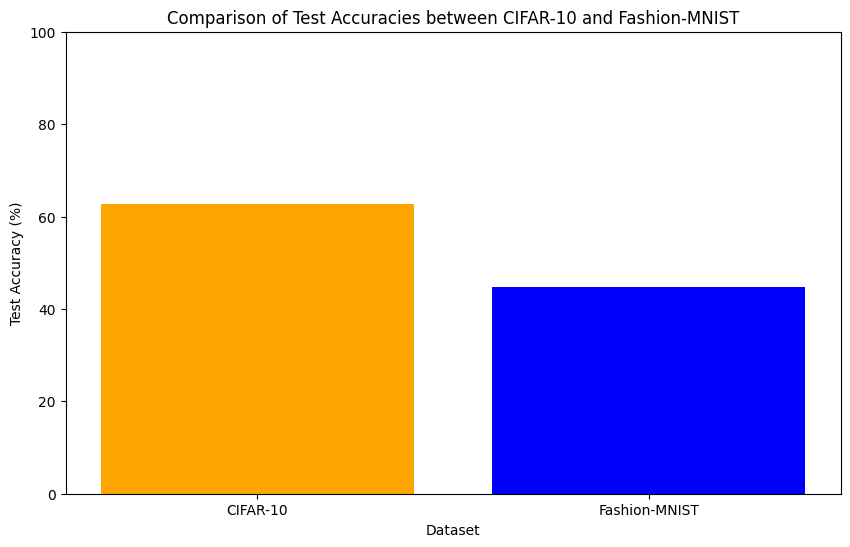

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame with test results
test_results = pd.DataFrame({
    'Dataset': ['CIFAR-10', 'Fashion-MNIST'],
    'Test Accuracy (%)': [test_accuracy_cifar10, test_accuracy_fashionMNIST]
})

# Plot
plt.figure(figsize=(10, 6))
colors = ['orange', 'blue']  # Different colors for each dataset
plt.bar(test_results['Dataset'], test_results['Test Accuracy (%)'], color=colors)

# Add labels and title
plt.xlabel('Dataset')
plt.ylabel('Test Accuracy (%)')
plt.title('Comparison of Test Accuracies between CIFAR-10 and Fashion-MNIST')
plt.ylim(0, 100)  # Set the y-axis limit for better comparison

# Show plot
plt.show()